In [431]:
import os
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.utils import shuffle


In [435]:
os.chdir('C:/Users/trainee201995/Desktop/anaconda') 
filename = 'final_data.csv'
dataset = pd.read_csv(filename)
dataset = shuffle(dataset)
print(list(dataset))
print("class : 0 is emptyland   " + "class : 1 is urban   " + "class : 2 is vegetation   " + "class : 3 is waterbody  ")

['Unnamed: 0', 'Unnamed: 0.1', 'lat', 'lon', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'class']
class : 0 is emptyland   class : 1 is urban   class : 2 is vegetation   class : 3 is waterbody  


In [436]:
Class_ID = dataset[['class']]
X = dataset[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
Y = np.ravel(Class_ID)
X = X

#print(X,Y)
#print(Y.shape)

In [454]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50,)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(np.sum(Y_train==0))
print(np.sum(Y_train==1))
print(np.sum(Y_train==2))
print(np.sum(Y_train==3))
#print(X_train[0])

(1026, 11)
(1027, 11)
(1026,)
(1027,)
768
258
0
0


In [455]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
print(X_train[0])
print(X_test[0])

[0.10112721 0.17385827 0.12829227 0.44461634 0.60312862 0.57531056
 0.65565736 0.61293583 0.51702533 0.58432871 0.45596591]
[0.19220056 0.29357413 0.32163743 0.65962364 0.61491375 0.59285714
 0.64878269 0.60531448 0.75164474 0.76013679 0.75167121]


In [456]:
input_num_units = 11
hidden1_num_units = 4
hidden2_num_units = 16
hidden3_num_units = 4

output_num_units = 2

In [457]:
model = Sequential([
    Dense(output_dim=hidden1_num_units, input_dim=input_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    
    Dense(output_dim=output_num_units, input_dim=hidden3_num_units, activation='softmax'),
 ])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, kernel_regularizer=<keras.reg..., activation="relu", units=4)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, kernel_regularizer=<keras.reg..., activation="relu", units=16)`
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=16, kernel_regularizer=<keras.reg..., activation="relu", units=4)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="softmax", units=2)`
  if __name__ == '__main__':


In [458]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 4)                 48        
_________________________________________________________________
dropout_160 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_188 (Dense)            (None, 16)                80        
_________________________________________________________________
dropout_161 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_189 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_162 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_190 (Dense)            (None, 2)                 10        
Total para

In [459]:
sgd = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

In [460]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [461]:
history=model.fit(X_train, 
          Y_train,
          epochs=200, 
          batch_size=64, 
          validation_split = 0.0,
          verbose=1,
          )

Epoch 1/200
1026/1026 [==============================] - 3s 3ms/step - loss: 0.7220 - acc: 0.5078
Epoch 2/200
1026/1026 [==============================] - 0s 25us/step - loss: 0.6014 - acc: 0.6881
Epoch 3/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.5768 - acc: 0.7173
Epoch 4/200
1026/1026 [==============================] - 0s 26us/step - loss: 0.5658 - acc: 0.7251
Epoch 5/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.5567 - acc: 0.7398
Epoch 6/200
1026/1026 [==============================] - 0s 26us/step - loss: 0.5662 - acc: 0.7398
Epoch 7/200
1026/1026 [==============================] - 0s 23us/step - loss: 0.5613 - acc: 0.7281
Epoch 8/200
1026/1026 [==============================] - 0s 24us/step - loss: 0.5573 - acc: 0.7427
Epoch 9/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.5469 - acc: 0.7417
Epoch 10/200
1026/1026 [==============================] - 0s 26us/step - loss: 0.5496 - acc: 0.7407
Epoch 11/2

1026/1026 [==============================] - 0s 24us/step - loss: 0.3252 - acc: 0.8782
Epoch 84/200
1026/1026 [==============================] - 0s 26us/step - loss: 0.3321 - acc: 0.9084
Epoch 85/200
1026/1026 [==============================] - 0s 20us/step - loss: 0.3269 - acc: 0.8986
Epoch 86/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.3226 - acc: 0.8850
Epoch 87/200
1026/1026 [==============================] - 0s 20us/step - loss: 0.3210 - acc: 0.8840
Epoch 88/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.3055 - acc: 0.8957
Epoch 89/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.3037 - acc: 0.8947
Epoch 90/200
1026/1026 [==============================] - 0s 22us/step - loss: 0.3028 - acc: 0.9006
Epoch 91/200
1026/1026 [==============================] - 0s 21us/step - loss: 0.3038 - acc: 0.9074
Epoch 92/200
1026/1026 [==============================] - 0s 27us/step - loss: 0.3045 - acc: 0.8967
Epoch 93/200


In [463]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


KeyError: 'val_acc'

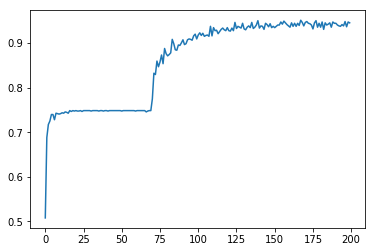

In [464]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

KeyError: 'val_loss'

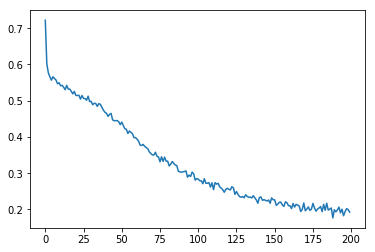

In [465]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [466]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test,batch_size=100, verbose=1)
print(X_test.shape)
print(Y_pred.shape)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

1027/1027 [==============================] - 1s 923us/step
(1027, 11)
(1027, 2)
[0.24361399788238985, 0.9250243513354308]
Baseline Error: 7.50%


In [467]:
test_class = model.predict_classes(X_test)
print(test_class.shape)
print(X_test.shape)
print(test_class)

(1027,)
(1027, 11)
[1 0 0 ... 0 0 0]


In [468]:
print("Confussion matrix:\n%s" %
      metrics.confusion_matrix(Y_test, test_class))

Confussion matrix:
[[775  10]
 [ 67 175]]


In [469]:
print("Classification report:\n%s" %
      metrics.classification_report(Y_test, test_class))
print("Classification accuracy: %f" %
      metrics.accuracy_score(Y_test, test_class))
#print(model.get_weights())

Classification report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       785
        True       0.95      0.72      0.82       242

   micro avg       0.93      0.93      0.93      1027
   macro avg       0.93      0.86      0.89      1027
weighted avg       0.93      0.93      0.92      1027

Classification accuracy: 0.925024


In [470]:
import osr
import gdal 
import math
arr = {}
ten_meter  = {2:"B2",3:"B3",4:"B4",8:"B8"}
twenty_meter = {5:'B5',6:'B6',7:'B7',9:'B8A',10:'B9',11:'B11',12:'B12'}
ds = gdal.Open("final_data_2.tif")
temp = ds.GetGeoTransform()
band = ds.GetRasterBand(2)
arr1 = band.ReadAsArray()
arr[2] = arr1
inp_data = np.zeros((11,arr[2].shape[0],arr[2].shape[1]),dtype = 'float64')
print(temp)

for no,col in ten_meter.items() :
    band = ds.GetRasterBand(no)
    arr1 = band.ReadAsArray()
    arr[no] = arr1 
    inp_data[no-2] =arr1
for no,col in twenty_meter.items() :
    band = ds.GetRasterBand(no)
    arr1 = band.ReadAsArray()
    arr[no] = arr1 
    inp_data[no-2] = arr1
inp_data = np.zeros((11,arr[2].shape[0],arr[2].shape[1]),dtype = 'float64')
temp_arr = np.zeros((1,11),dtype='float64')
classified_arr = np.zeros((arr[2].shape[0],arr[2].shape[1]),dtype = 'float64')

(77.51050546955403, 8.983152841195215e-05, 0.0, 30.381202571979042, 0.0, -8.983152841195215e-05)


In [471]:
#print(arr[2].shape)
#print(arr[3].shape)
#colour_arr = np.zeros((3,arr[2].shape[0],arr[2].shape[1]),dtype='float64')
#print(colour_arr.shape)
count_arr = np.zeros((1,4),dtype = 'int64')
#dict_colour = {0:(139,69,19),1:(128,128,128),2:(0,128,0),3:(0,0,255)}
for i in range(arr[2].shape[0]) :
    for j in range(arr[2].shape[1]) : 
        temp_arr[0] = inp_data[:,i,j]
        if not math.isnan(temp_arr[0][0]) :
            colour_value = model.predict_classes(temp_arr)
            count_arr[0][colour_value] += 1
            classified_arr[i][j] = colour_value
        #rgb_val = dict_colour[classified_arr[i][j]]
        #colour_arr[:,i,j] = rgb_val 
    print(str(i)+"th row over !!!!" + str(count_arr))

0th row over !!!![[   0 4811    0    0]]
1th row over !!!![[   0 9622    0    0]]
2th row over !!!![[    0 14433     0     0]]
3th row over !!!![[    0 19244     0     0]]
4th row over !!!![[    0 24055     0     0]]
5th row over !!!![[    0 28866     0     0]]
6th row over !!!![[    0 33677     0     0]]
7th row over !!!![[    0 38488     0     0]]
8th row over !!!![[    0 43299     0     0]]
9th row over !!!![[    0 48110     0     0]]
10th row over !!!![[    0 52921     0     0]]
11th row over !!!![[    0 57732     0     0]]
12th row over !!!![[    0 62543     0     0]]
13th row over !!!![[    0 67354     0     0]]
14th row over !!!![[    0 72165     0     0]]
15th row over !!!![[    0 76976     0     0]]
16th row over !!!![[    0 81787     0     0]]
17th row over !!!![[    0 86598     0     0]]
18th row over !!!![[    0 91409     0     0]]
19th row over !!!![[    0 96220     0     0]]
20th row over !!!![[     0 101031      0      0]]
21th row over !!!![[     0 105842      0      0]

KeyboardInterrupt: 

In [ ]:
print(colour_arr.shape)
#print(colour_arr)
print(count_arr)
#print(np.min(colour_arr[0]))
#print(np.max(colour_arr[0]))

In [ ]:

driver = gdal.GetDriverByName('GTiff')
ds1 = driver.Create('final_marking1.tif',colour_arr.shape[2],colour_arr.shape[1],1, gdal.GDT_Float32)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  
ds1.SetProjection(srs.ExportToWkt())
ds1.SetGeoTransform(ds.GetGeoTransform())


temp_ar=classified_arr
outband=ds1.GetRasterBand(1)
outband.SetStatistics(np.min(temp_ar), np.max(temp_ar), np.average(temp_ar),np.std(temp_ar))
outband.WriteArray(temp_ar)
outband.FlushCache()

outband =None 
band = None
ds1 = None
ds=None